In [76]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#  Load data
dataset  = pd.read_csv('2008-01-02-LEH.N-bbo.csv', index_col = 0)
dataset.index = pd.DatetimeIndex(dataset.index)

difference_set = np.log(dataset).diff()
difference_set.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,NaN,NaN,NaN,NaN
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.089612
2008-01-02 14:31:59.900999680,0.000000,0.875469,0.0,0.000000
2008-01-02 14:31:59.900999680,0.000000,0.000000,0.0,-0.015748
2008-01-02 14:31:59.900999680,0.000000,-0.875469,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000616,-0.916291,0.0,0.000000
2008-01-02 14:31:59.948000000,0.000770,-0.693147,0.0,0.000000
2008-01-02 14:31:59.948000000,-0.000770,0.693147,0.0,0.000000
2008-01-02 14:31:59.968999936,-0.000771,2.708050,0.0,0.000000


In [78]:
dataset.head(10)

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.0,70
2008-01-02 14:31:59.900999680,64.95,5,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,64
2008-01-02 14:31:59.900999680,64.95,12,65.0,63
2008-01-02 14:31:59.900999680,64.95,5,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.948000000,64.96,1,65.0,63
2008-01-02 14:31:59.948000000,64.91,2,65.0,63
2008-01-02 14:31:59.968999936,64.86,30,65.0,63


In [79]:
dataset

,bid-price,bid-volume,ask-price,ask-volume
time,,,,
2008-01-02 14:31:59.900999680,64.95,5,65.00,70
2008-01-02 14:31:59.900999680,64.95,5,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,64
2008-01-02 14:31:59.900999680,64.95,12,65.00,63
2008-01-02 14:31:59.900999680,64.95,5,65.00,63
...,...,...,...,...
2008-01-02 20:59:59.602999552,62.23,13,62.24,5
2008-01-02 20:59:59.668000000,62.23,33,62.24,5
2008-01-02 21:00:00.089000192,62.23,23,62.24,5


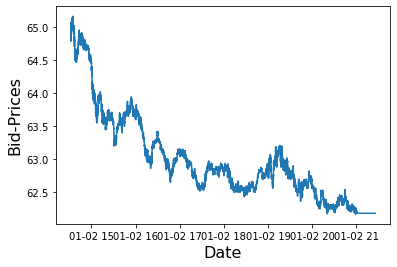

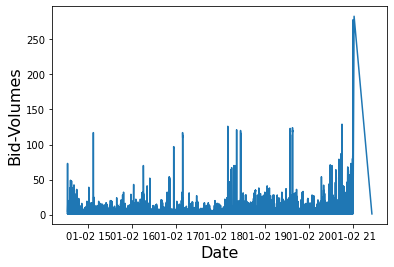

In [80]:
plt.figure(1)
plt.plot(dataset['bid-price'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Prices', fontsize = 16)
plt.show()

plt.figure(2)
plt.plot(dataset['bid-volume'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Bid-Volumes', fontsize = 16)
plt.show()

In [81]:
price_b_var = difference_set['bid-price']
volume_b_var = difference_set['bid-volume']

In [82]:
price_b_var =price_b_var[(price_b_var !=0)]
volume_b_var =volume_b_var[volume_b_var !=0]

price_b_var = price_b_var.iloc[1:]
volume_b_var = volume_b_var.iloc[1:]

In [83]:
price_b_var  = price_b_var[~price_b_var.index.duplicated(keep = 'last')]
volume_b_var  = volume_b_var[~volume_b_var.index.duplicated(keep = 'last')]

In [84]:
data = pd.concat([price_b_var, volume_b_var], axis = 1)

In [85]:
data = data.ffill(axis = 0)
data

,bid-price,bid-volume
time,,
2008-01-02 14:31:59.900999680,NaN,-0.875469
2008-01-02 14:31:59.948000000,-0.000770,0.693147
2008-01-02 14:31:59.968999936,-0.000771,2.708050
2008-01-02 14:32:00.036000000,-0.000154,-0.836248
2008-01-02 14:32:00.086000384,0.000771,-1.178655
...,...,...
2008-01-02 20:59:59.602999552,0.000643,0.167054
2008-01-02 20:59:59.668000000,0.000643,0.931558
2008-01-02 21:00:00.089000192,0.000643,-0.361013


In [86]:
data_price = data.loc[price_b_var.index].iloc[1:]
data_price['Return'] = data_price['bid-price']
data_price['Bid Volume Variation'] = data_price['bid-volume']
price_b_var[~price_b_var.index.duplicated(keep = 'last')]
data_price['Bid Volume'] = dataset['bid-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Price'] = dataset['ask-price'][~dataset.index.duplicated(keep = 'last')]
data_price['Ask Volume'] = dataset['ask-volume'][~dataset.index.duplicated(keep = 'last')]
data_price['Bid Price'] = dataset['bid-price'][~dataset.index.duplicated(keep = 'last')]
del data_price['bid-price']
del data_price['bid-volume']

df = data_price
# df['Return'] = df['Return'][~dataset.index.duplicated(keep = 'last')]
del df['Bid Volume']
df

,Return,Bid Volume Variation,Ask Price,Ask Volume,Bid Price
time,,,,,
2008-01-02 14:31:59.968999936,-0.000771,2.708050,65.00,63,64.86
2008-01-02 14:32:00.036000000,-0.000154,-0.836248,65.00,60,64.85
2008-01-02 14:32:00.086000384,0.000771,-1.178655,65.00,60,64.90
2008-01-02 14:32:00.100000256,-0.000771,1.178655,65.00,60,64.85
2008-01-02 14:32:00.734000384,0.000154,-4.290459,64.95,1,64.80
...,...,...,...,...,...
2008-01-02 20:59:41.705000192,-0.000161,3.417727,62.21,1,62.19
2008-01-02 20:59:53.475000064,-0.000161,2.275556,62.24,1,62.18
2008-01-02 20:59:55.706000384,0.000161,-1.938742,62.28,49,62.19


In [87]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

from lineartree import LinearTreeRegressor

In [88]:
data = difference_set['bid-price']
data = data.loc[data.shift() != data]
data

time
2008-01-02 14:31:59.900999680         NaN
2008-01-02 14:31:59.900999680    0.000000
2008-01-02 14:31:59.948000000   -0.000616
2008-01-02 14:31:59.948000000    0.000770
2008-01-02 14:31:59.948000000   -0.000770
                                   ...   
2008-01-02 20:59:55.906000128    0.000000
2008-01-02 20:59:59.514000128    0.000643
2008-01-02 20:59:59.514000128    0.000000
2008-01-02 21:01:16.213999616   -0.000804
2008-01-02 21:25:28.845999872    0.000000
Name: bid-price, Length: 28950, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Return'], df['Return'], 
    test_size=0.4, shuffle=False)

X_train.shape, X_test.shape

((9208,), (6140,))

In [90]:
np.array(X_test)

array([ 0.00015976, -0.00015976, -0.00015978, ...,  0.00016081,
        0.00064298, -0.00080379])

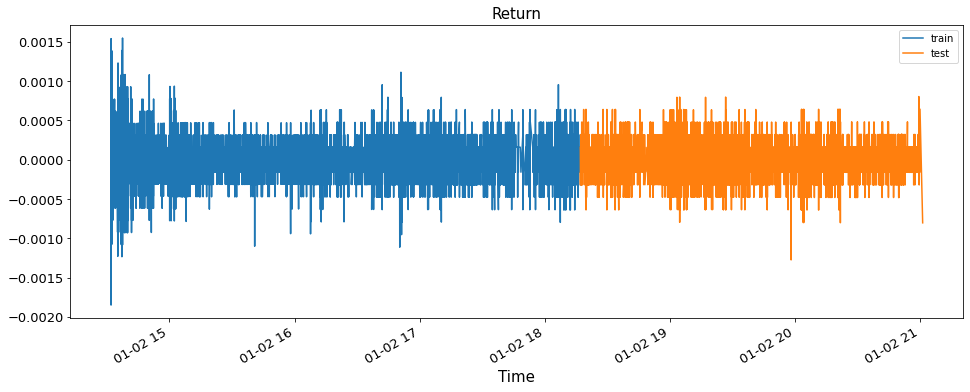

In [91]:
# We plot:

y_train.plot(label='train', figsize=(16,6))
y_test.plot(label='test')
plt.title('Return',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.tick_params(labelsize=13)
plt.legend()

In [92]:
# TUNING A LINEAR TREE

model = GridSearchCV(estimator=LinearTreeRegressor(Ridge(), criterion='rmse'),
                     param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [0.4, 0.3, 0.2]}, 
                     n_jobs=-1, cv=2, scoring='neg_mean_squared_error', refit=True)

model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))

model.best_params_

{'max_depth': 3, 'min_samples_split': 0.3}

In [93]:
# COMPUTE TEST ERROR FOR LINEAR TREE
pred_lt = pd.Series(model.predict(np.array(X_test).reshape(-1, 1)), index = y_test.index)
mean_squared_error(y_test, pred_lt, squared=False)

0.00014869250209131462

In [94]:
# TUNING THE LINEAR REGRESSION

model = GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 3, 5, 10, 20]}, 
                     scoring='neg_mean_squared_error', cv=2, refit=True)

model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
model.best_params_

{'alpha': 1}

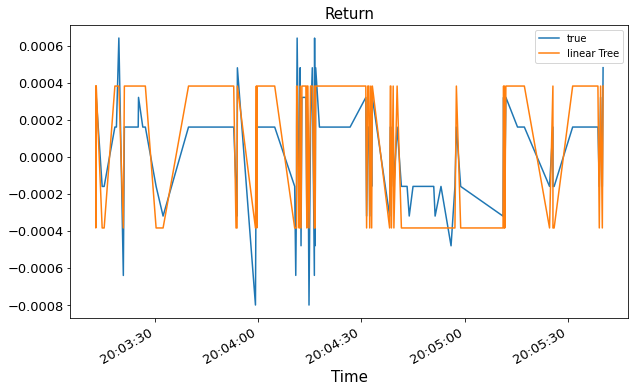

In [95]:
# PLOT AND COMPARE PREDICTIONS

y_test[4000:4100].plot(label='true', figsize=(10,6))
pred_lt[4000:4100].plot(label='linear Tree')

plt.title('Return',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.tick_params(labelsize=13)
plt.legend()
plt.legend()


c:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


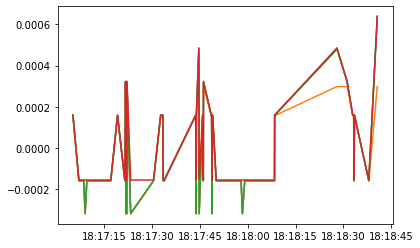

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

# Fit models
lower_model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
mid_model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
upper_model.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
# Record actual values on test set
predictions = pd.DataFrame(y_test)
# Predict
predictions['lower'] = lower_model.predict(np.array(X_test).reshape(-1, 1))
predictions['mid'] = mid_model.predict(np.array(X_test).reshape(-1, 1))
predictions['upper'] = upper_model.predict(np.array(X_test).reshape(-1, 1))

plt.plot(predictions[:50])
plt.show()

In [97]:
from sklearn.ensemble import GradientBoostingPredictionIntervals

# Instantiate the class
model = GradientBoostingPredictionIntervals(
    lower_alpha=0.1, upper_alpha=0.9
)
# Fit and make predictions
_ = model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
fig = model.plot_intervals(mid=True, start='2017-05-26', 
                           stop='2017-06-01')
iplot(fig)

ImportError: cannot import name 'GradientBoostingPredictionIntervals' from 'sklearn.ensemble' (c:\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)